## Aims

We process RTS sample scenarios to understand input-output relationship between RTS scenarios and Vatic outputs:
(i) total daily system costs; 
(ii) lost load; 
(iii) renewable curtailment. 

The aggregated solar, wind, load assets are considered below for January 20, April 02, June 30, July 23, October 17. The results for the dates are shown sequentially. We consider the non-idealization setting where all load, solar and wind are stochastic and in that case we try to understand the relationship between the scenarios and the Vatic output. 



In [1]:
import pandas as pd
import bz2
import dill as pickle
import pandas as pd
import csv
import matplotlib.pyplot as plt
from numpy import mean
import numpy as np
import math
import seaborn as sns

In [2]:
def LoadShedHours(hours, LoadShed,date):
    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(1,2,1)
    DurationLoadShed=[]
    for i in range(0,24000,24):
        #print(i)
        a=LoadShed[i:i+23]
        #print(a)
        d=np.count_nonzero(a) 
        DurationLoadShed.append(d)
    ax.set_ylabel("Frequency-"+date,fontsize=15)
    ax.set_xlabel("Duration of Load Shed",fontsize=15)
    ax.hist(DurationLoadShed, bins=10,color = "b")
    plt.show
    plt.grid()
    ax.tick_params(labelsize=15)

In [3]:
def plotScens(xTime, yScens,yFrcst,yMean, ax=None, legend=0, **plt_kwargs):
    if ax is None:
        ax = plt.gca()
        
    ci9 = np.quantile(yScens, 0.9, axis=0)
    ci975 = np.quantile(yScens, 0.975, axis=0)
    ci995 = np.quantile(yScens, 0.995, axis=0)
    ciMax = np.max(yScens,axis=0)
    ci1 = np.quantile(yScens, 0.1, axis=0)
    ci025 = np.quantile(yScens, 0.025, axis=0)
    ci005 = np.quantile(yScens, 0.005, axis=0)
    ciMin = np.min(yScens, axis=0)
    ax.fill_between(xTime, ci005, ci995, color='gray', alpha=.15)
    ax.fill_between(xTime, ci025, ci975, color='b', alpha=.2, label=r'CI $95\%$')
    ax.fill_between(xTime, ci1, ci9, color='b', alpha=.2)
    ax.fill_between(xTime, ciMin, ciMax,color='gray',alpha=0.07)
    ax.plot(xTime,yFrcst,'-o',color='darkorange',linewidth=2,markersize=8,label='Forecast')
    ax.plot(xTime, yMean,'--b', label='Mean')
    ax.set_xlim(left=-0.25,right=23.25)
    ax.set_xticks([0,6,12,18,24])
    ax.set_xticklabels(('0', '6', '12', '18', '24'), fontsize='13', horizontalalignment='right')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(linewidth=0.25)
    #ax.axis('off')

    if legend > 0:
        ax.legend(fontsize=12)
    #ax.plot(x, y, **plt_kwargs) ## example plot here
    return(ax)

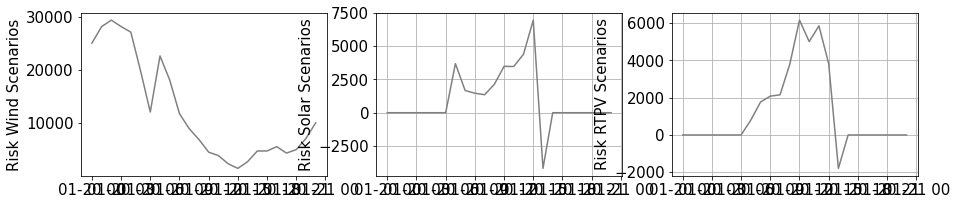

In [4]:
import bz2
import matplotlib.pyplot as plt
import dill as pickle
out_file = 'allocs_RTS.p.gz'
with bz2.BZ2File(out_file, 'r') as f:
    day_scens = pickle.load(f)
    RiskWind=day_scens['jan20']['type']['Wind']
    RiskSolar=day_scens['jan20']['type']['PV']
    RiskRTPV=day_scens['jan20']['type']['RTPV']
    #RiskWind=day_scens['jun30']['asset']['309_WIND_1']+day_scens['jun30']['asset']['317_WIND_1']+day_scens['jun30']['asset']['303_WIND_1']+day_scens['jun30']['asset']['122_WIND_1']
    #print(day_scens['jun30']['asset']['309_WIND_1'])
    #print(RiskWind)
    time=RiskWind.keys()
#print(AggregatedWindForecast)
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
ax.set_ylabel("Risk Wind Scenarios",fontsize=15)
ax.plot(RiskWind.T,'gray')
plt.show
plt.grid()
ax.tick_params(labelsize=15)
#ax.set_xlim(left=-0.25,right=23.25)
#ax.set_xticks([0,6,12,18,24])
#ax.set_xticklabels(('0', '6', '12', '18', '24'), fontsize='13', horizontalalignment='right')
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.grid(linewidth=0.25)

#ax.set_xticks([0,6,12,18,24])
#ax.set_xticklabels(('0', '6', '12', '18', '24'), fontsize='13', horizontalalignment='right')

ax = fig.add_subplot(1,3,2)
ax.set_ylabel("Risk Solar Scenarios",fontsize=15)
ax.plot(RiskSolar.T,'gray')
plt.show
plt.grid()
ax.tick_params(labelsize=15)
#ax.set_xticks([0,6,12,18,24])
#ax.set_xticklabels(('0', '6', '12', '18', '24'), fontsize='13', horizontalalignment='right')

ax = fig.add_subplot(1,3,3)
ax.set_ylabel("Risk RTPV Scenarios",fontsize=15)
ax.plot(RiskRTPV.T,'gray')
plt.show
plt.grid()
ax.tick_params(labelsize=15)
#ax.set_xticks([0,6,12,18,24])
#ax.set_xticklabels(('0', '6', '12', '18', '24'), fontsize='13', horizontalalignment='right')


In [5]:
from GenCostIntegrationScenario import *

def PlotingScenarios(time, WindScenarios,WindForecast,WindMean,SolarScenarios,SolarForecast,SolarMean, LoadScenarios,LoadForecast,LoadMean, date):
    #, VaticOutput, LoadShedHour):
    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(1,6,1)
    ax.set_ylabel("Wind-"+date,fontsize=15)
    #gs = GridSpec(15, 15)
    #ax = fig.add_subplot(gs[0:5, 0:5])
    #ax_hist_x = fig.add_subplot(gs[0,0:5])
    #ax_hist_y = fig.add_subplot(gs[5:10, 5])
    
    #ax_hist_x.invert_yaxis()
    ax = plotScens(time, WindScenarios,WindForecast,WindMean, ax=ax, legend=1)

    ax = fig.add_subplot(1,6,2)
    ax.plot(time, RiskWind,'gray')
    ax.set_xlim(left=-0.25,right=23.25)
    ax.set_xticks([0,6,12,18,24])
    ax.set_xticklabels(('0', '6', '12', '18', '24'), fontsize='13', horizontalalignment='right')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(linewidth=0.25)

    
    ax = fig.add_subplot(1,6,3)
    ax.set_ylabel("Solar-"+date,fontsize=15)
    ax = plotScens(time, SolarScenarios,SolarForecast,SolarMean, ax=ax)
    
    ax = fig.add_subplot(1,6,4)
    ax.plot(time, RiskSolar,'gray')
    ax.set_xlim(left=-0.25,right=23.25)
    ax.set_xticks([0,6,12,18,24])
    ax.set_xticklabels(('0', '6', '12', '18', '24'), fontsize='13', horizontalalignment='right')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(linewidth=0.25)

 
    ax = fig.add_subplot(1,6,5)
    ax.set_ylabel("Net Load-"+date,fontsize=15)
    ax = plotScens(time, LoadScenarios,LoadForecast,LoadMean, ax=ax)
    
    
    
def PlotingVaticOutput(time, GenerationCostAll, LoadSheddingAll, RenewableCurtailmentAll, date):
    GenerationCostAll=VaticOutput['GenerationCostAll']
    LoadSheddingAll=VaticOutput['LoadSheddingAll']
    RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    
    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(1,4,1)
    ax.set_ylabel("Generation Cost-"+date,fontsize=15)
    ax.hist(GenerationCostAll, bins=20, color='lightblue')
    plt.xlim(0, 900000)
    plt.locator_params(axis="x", nbins=4)
    plt.grid(linewidth=0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)

    ax = fig.add_subplot(1,4,2)
    ax.set_ylabel("Load Shedding-"+date,fontsize=15)
    ax.hist(LoadSheddingAll, bins=25, color='lightblue')
    plt.locator_params(axis="x", nbins=4)
    plt.ylim(0,100)
    plt.grid(linewidth=0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)

    ax = fig.add_subplot(1,4,3)
    ax.set_ylabel("Ren. Curtailment-"+date,fontsize=15)
    ax.hist(RenewableCurtailmentAll, bins=20, color='lightblue')
    plt.locator_params(axis="x", nbins=4)
    plt.xlim(0,30000)
    plt.grid(linewidth=0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)
    
    ax = fig.add_subplot(1,4,4)
    ax.set_ylabel("Ren. Curtailment-"+date,fontsize=15)
    ax.scatter(RenewableCurtailmentAll,GenerationCostAll, color='green')
    plt.locator_params(axis="x", nbins=4)
    plt.xlim(0,16000)
    plt.ylim(0,800000)
    plt.grid(linewidth=0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)
    
def PlotingRelationship1(time, WindScenarios,WindForecast,WindMean,SolarScenarios,SolarForecast,SolarMean, LoadScenarios,LoadForecast,LoadMean, date, showHist):

    DifferenceLoadWindSolar=LoadScenarios-WindScenarios-SolarScenarios
    Thresold=mean(DifferenceLoadWindSolar)
    HighGenCost, IntegrationScen, ax=GenCostIntegrationScen(DifferenceLoadWindSolar, Thresold, GenerationCostAll, RenewableCurtailmentAll, LoadSheddingAll, time,showHist=showHist)
    ax.set_xlabel("Net Load GWh",fontsize=13)
    
def PlotingRelationship2(time, WindScenarios,WindForecast,WindMean,SolarScenarios,SolarForecast,SolarMean, LoadScenarios,LoadForecast,LoadMean, date, showHist):

    DifferenceLoadWindSolar=WindScenarios
    thresh = np.quantile(np.sum(WindScenarios,axis=1),0.05)
    print(thresh)
    Thresold=mean(DifferenceLoadWindSolar)
    HighGenCost, IntegrationScen, ax=GenCostIntegrationScen(DifferenceLoadWindSolar, Thresold, GenerationCostAll, RenewableCurtailmentAll, LoadSheddingAll, time, showHist=showHist, genThresh=thresh)
    ax.set_xlabel("Wind Generation GWh "+date,fontsize=13)
    
def PlotingRelationship3(time, WindScenarios,WindForecast,WindMean,SolarScenarios,SolarForecast,SolarMean, LoadScenarios,LoadForecast,LoadMean, date):

    DifferenceLoadWindSolar=SolarScenarios
    Thresold=mean(DifferenceLoadWindSolar)
    HighGenCost, IntegrationScen=GenCostIntegrationScen(DifferenceLoadWindSolar, Thresold, GenerationCostAll, RenewableCurtailmentAll, LoadSheddingAll, time)


### First, we visualize the input scenarios for the 4 sample days. 
The right-most panel is net load = Load - Wind - Solar

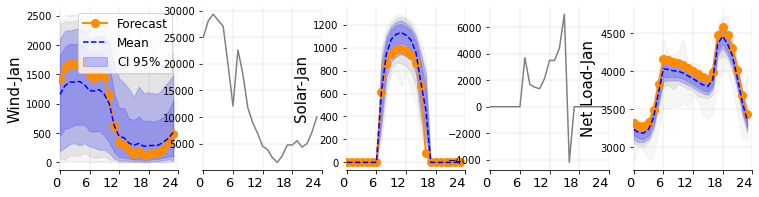

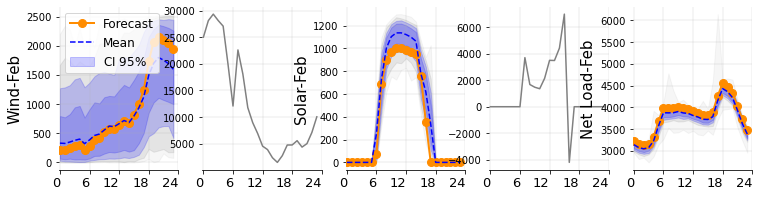

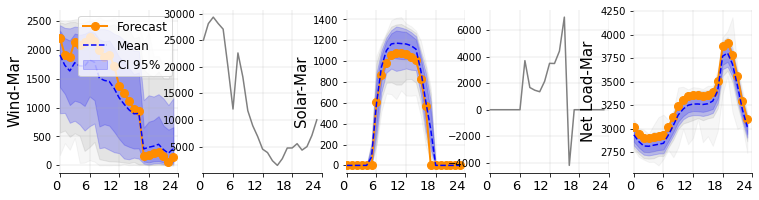

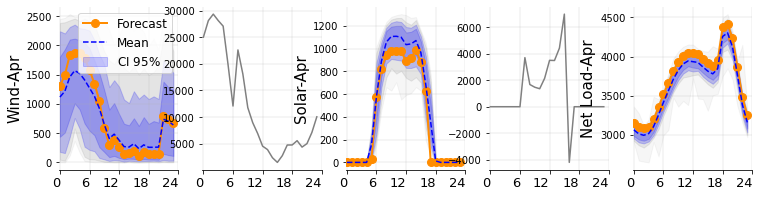

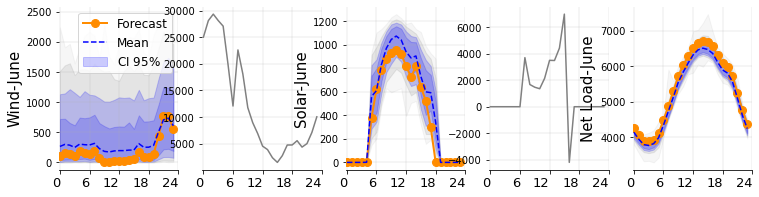

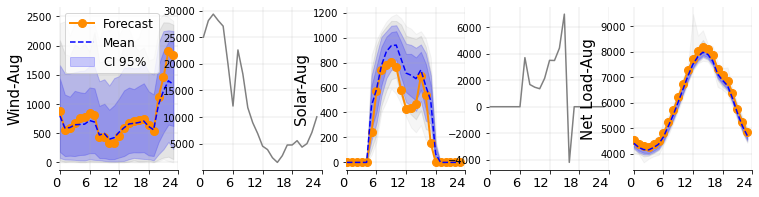

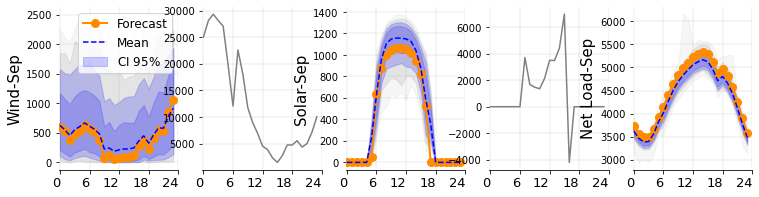

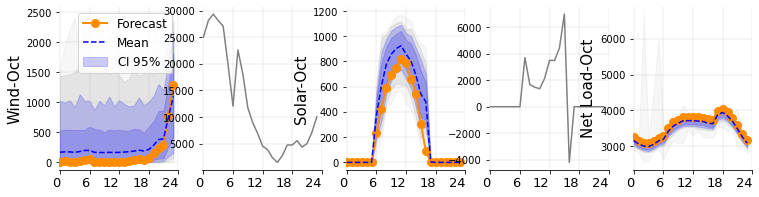

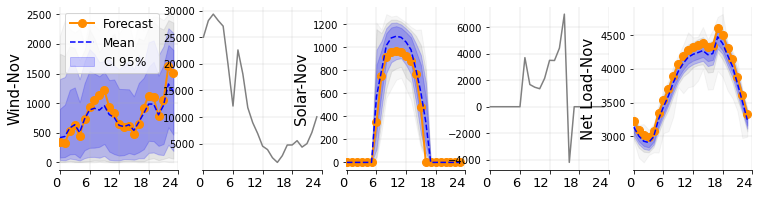

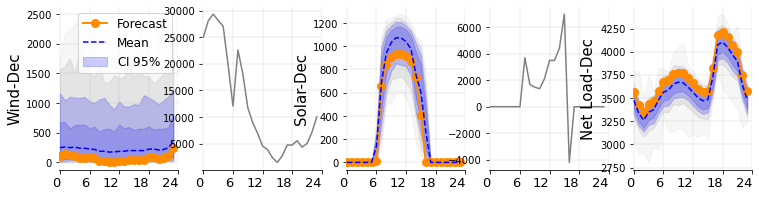

In [6]:
file_dir = "C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData\\ProcessedData"
 #"C:\\Users\\mludk\\Dropbox\\ORFEUSRTSData\\ProcessedData" #  
for date in ["Jan","Feb","Mar","Apr","June","Aug","Sep","Oct","Nov","Dec"]:
    Forecast = pd.read_csv(file_dir+date+"\\Forecast.csv")
    Mean = pd.read_csv(file_dir+date+"\\Mean.csv")
    WindScenarios = pd.read_csv(file_dir+date+"\\WindScenariosAggregated.csv")
    SolarScenarios=pd.read_csv(file_dir+date+"\\SolarScenariosAggregated.csv")
    LoadScenarios=pd.read_csv(file_dir+date+"\\LoadScenariosAggregated.csv")
    WindMean=Mean['WindMean']
    SolarMean=Mean['SolarMean']
    LoadMean=Mean['LoadMean']
    time= Mean['time']
    WindForecast=Forecast['WindForecast']
    SolarForecast=Forecast['SolarForecast']
    LoadForecast=Forecast['LoadForecast']
    PlotingScenarios(time, WindScenarios,WindForecast,WindMean,SolarScenarios,SolarForecast,SolarMean, LoadScenarios,LoadForecast,LoadMean, date)

A few observations:
    - Wind capacity is about double compared to Solar, and hence is more likely to affect system status
    - Wind has much higher variance compared to Solar, which will further amplify the role of Wind as far as extremal scenarios go
     - Even on days where the wind forecast is close to zero, some scenarios will include outputs close to 100%
    - Net Load is lowest at night, and peaks around 6pm. Thus, scenario deviations in late afternoon are most likely to impact grid status/costs
    - While Solar has a clear diurnal pattern, Wind daily patterns vary widely across days, making that analysis more challenging

### Next we summarize the distribution of generation costs, load shed and renewable curtailment

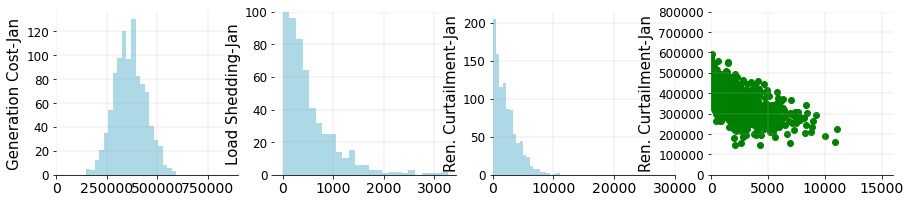

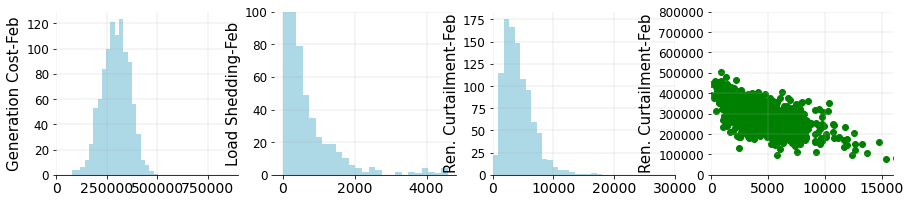

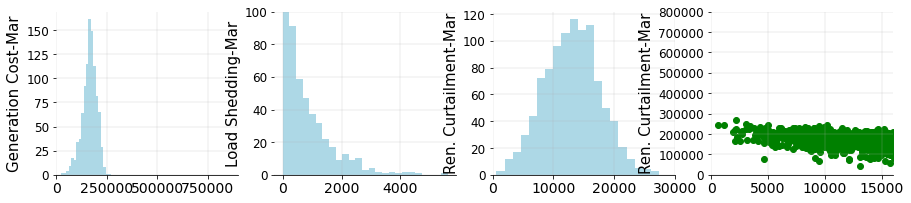

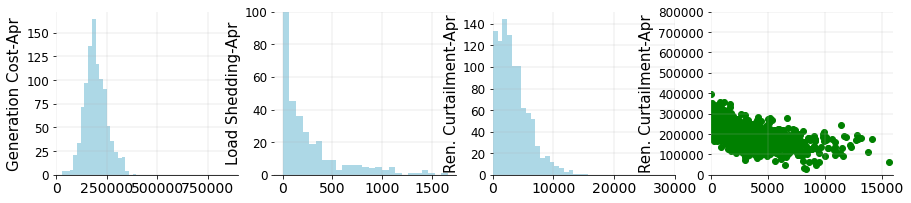

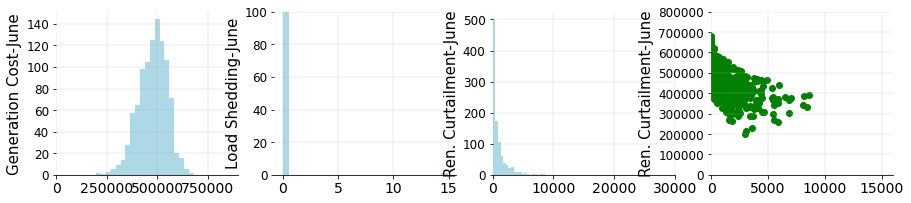

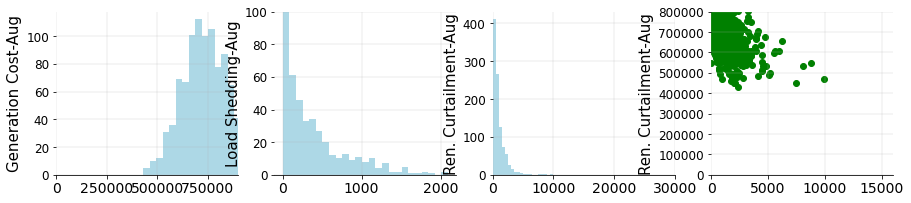

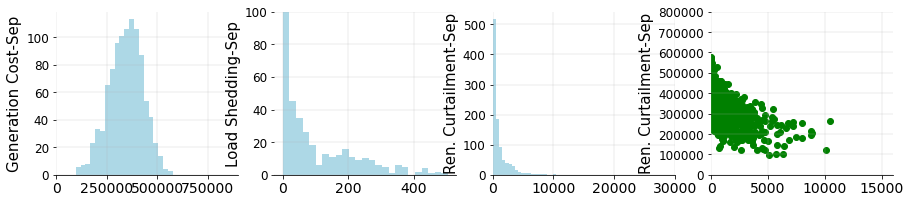

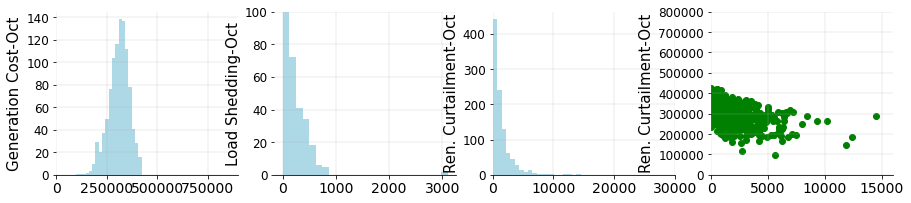

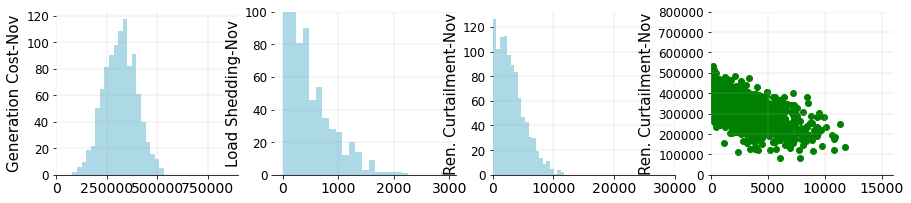

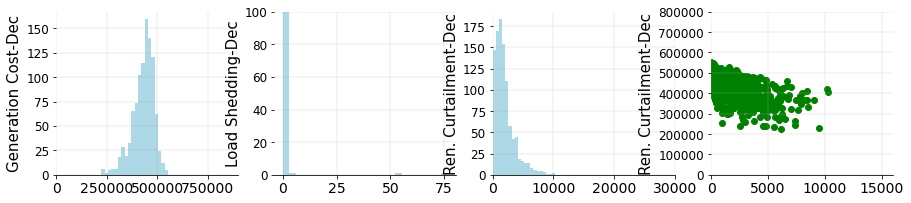

In [6]:
for date in ["Jan","Feb","Mar","Apr","June","Aug","Sep","Oct","Nov","Dec"]:
    VaticOutput = pd.read_csv(file_dir+date+"\\VaticOutput.csv")
    GenerationCostAll=VaticOutput['GenerationCostAll']
    LoadSheddingAll=VaticOutput['LoadSheddingAll']
    RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    PlotingVaticOutput(time,GenerationCostAll, LoadSheddingAll, RenewableCurtailmentAll, date)

Different days have different behavior:
    -- Jan: high cost, high shedding, high curtailment
    -- April: low cost, medium shedding, extreme curtailment
    -- June: high host, no shedding, moderate curtailment
    -- Oct: low cost, medium load shed, medium curtailment
    

There is no apparent link between scenarios that cause the highest generation costs versus the scenarios causing Load shedding or high renewable curtailment.

### Relationship between generation cost and net load

There is a strong positive relationship between net load and generation costs. So high generation costs are partly predictable
based on scenarios with low renewable production.

Daily production GWh for the mean, 63673.651625499995


C:\Users\Mahashweta Patra\GenCostIntegrationScenario.py:170: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_scatter.set_xticklabels(ax_scatter.get_xticks(), rotation = 90, fontsize=10)


check 1237.047979699999
Probability/2 0
Daily production GWh for the mean, 58812.26640839998
check 1596.00289175
Probability/2 0
Daily production GWh for the mean, 37731.509836900004
check 2045.7410188499998
Probability/2 0
Daily production GWh for the mean, 58009.53733880001
check 532.9280613499998
Probability/2 0
Daily production GWh for the mean, 106011.84560320002
check 0.0
Probability/2 0
Daily production GWh for the mean, 115009.69582960002
check 938.3456229999997
Probability/2 0
Daily production GWh for the mean, 81284.47088749996
check 244.93053079999999
Probability/2 0
Daily production GWh for the mean, 68962.20681959999
check 423.928528
Probability/2 1
Daily production GWh for the mean, 61982.57373689999
check 1210.0275269999995
Probability/2 0
Daily production GWh for the mean, 73089.1726718
check 0.0
Probability/2 0


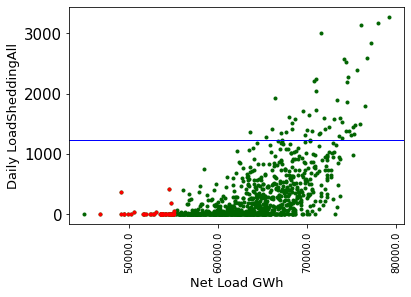

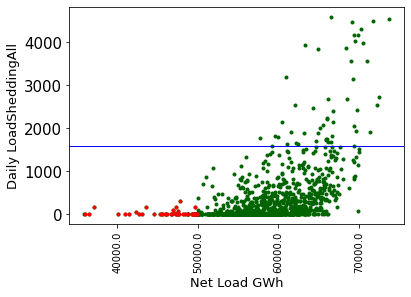

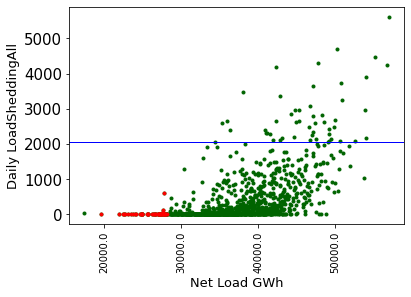

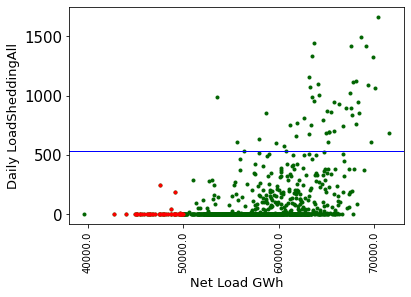

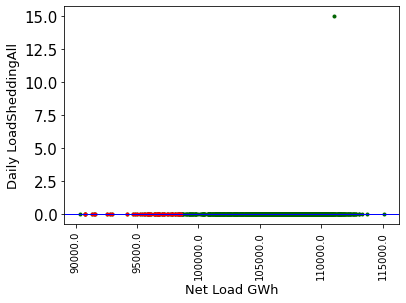

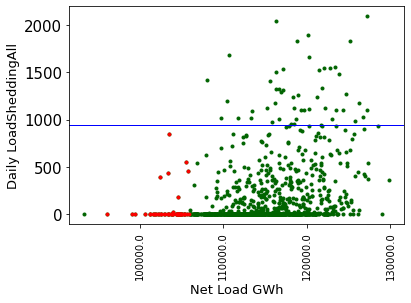

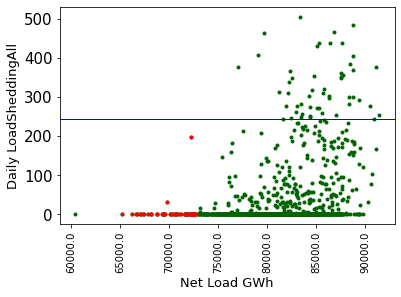

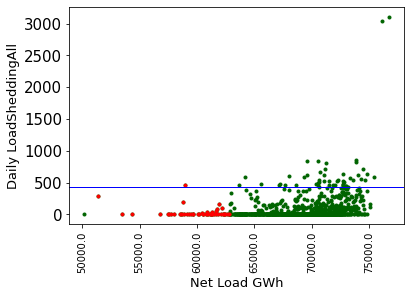

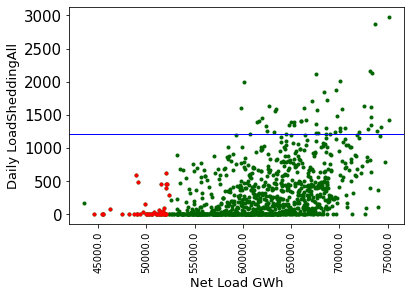

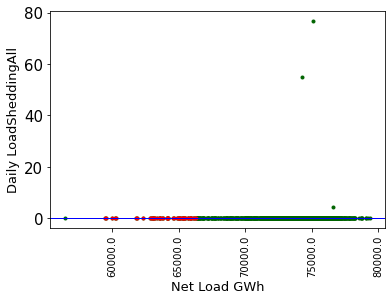

In [7]:
for date in ["Jan","Feb","Mar","Apr","June","Aug","Sep","Oct","Nov","Dec"]:
    Mean = pd.read_csv(file_dir+date+"\\Mean.csv")
    WindScenarios = pd.read_csv(file_dir+date+"\\WindScenariosAggregated.csv")
    SolarScenarios=pd.read_csv(file_dir+date+"\\SolarScenariosAggregated.csv")
    LoadScenarios=pd.read_csv(file_dir+date+"\\LoadScenariosAggregated.csv")
    VaticOutput = pd.read_csv(file_dir+date+"\\VaticOutput.csv")
    time= Mean['time']
    GenerationCostAll=VaticOutput['GenerationCostAll']
    LoadSheddingAll=VaticOutput['LoadSheddingAll']
    RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    PlotingRelationship1(time, WindScenarios,WindForecast,WindMean,SolarScenarios,SolarForecast,SolarMean, LoadScenarios,LoadForecast,LoadMean, date, True)
    

Generation cost and daily production GWh maintain a linear relationship in case of wind and load-wind-solar but only from the solar scenarios it is not possible to predict the scenarios having high generation cost.

Scenarios having rapid/abrupt jump in net load are not directy connected to high Generation cost or daily Load shedding.


## Low wind generation is driving high generation cost

Because wind is the dominant renewable and is also more volatile, it is the main driver of generation costs. Lowest 5% of wind scenarios are highly predictive of highest 5% of generation cost scenarios.

9884.691324999998
Daily production GWh for the mean, 18611.103845999998
check 1237.047979699999
Probability/2 26
12106.553945000005
Daily production GWh for the mean, 20164.438462
check 1596.00289175
Probability/2 22
17009.875434999998
Daily production GWh for the mean, 26917.463909600003
check 2045.7410188499998
Probability/2 20
10307.662569999999
Daily production GWh for the mean, 17786.862796200003
check 532.9280613499998
Probability/2 24
2946.3540450000005
Daily production GWh for the mean, 7519.671978700001
check 0.0
Probability/2 0
8941.152965
Daily production GWh for the mean, 17072.7616901
check 938.3456229999997
Probability/2 10
5265.588615
Daily production GWh for the mean, 11148.357832600002
check 244.93053079999999
Probability/2 8
2277.53364
Daily production GWh for the mean, 6326.272027400004
check 423.928528
Probability/2 9
10374.602524999998
Daily production GWh for the mean, 18682.091492000007
check 1210.0275269999995
Probability/2 15
1725.7210449999998
Daily production

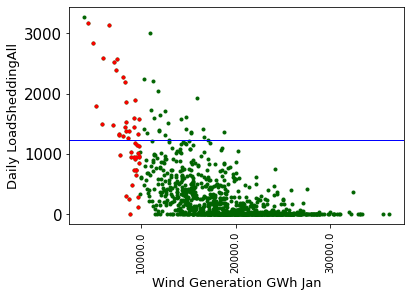

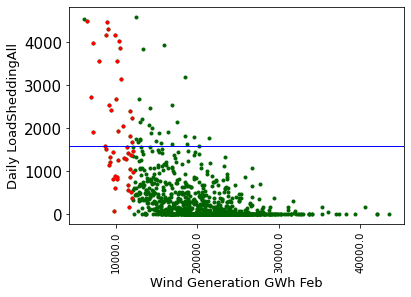

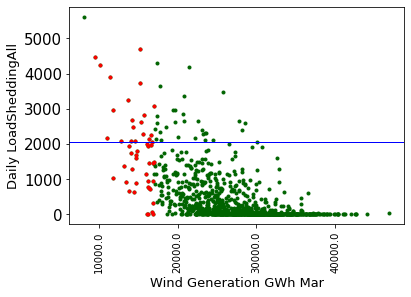

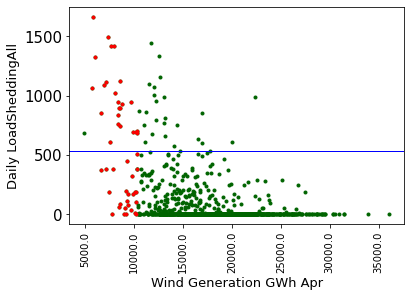

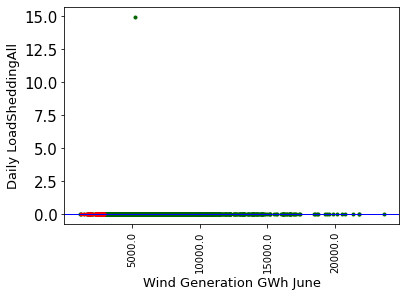

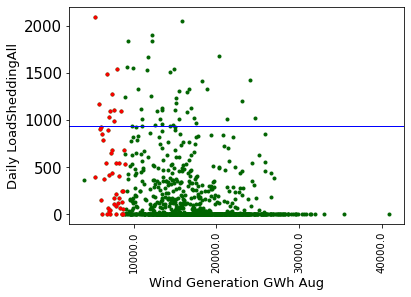

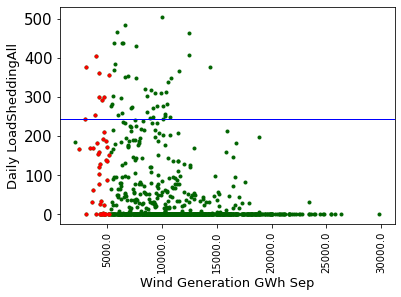

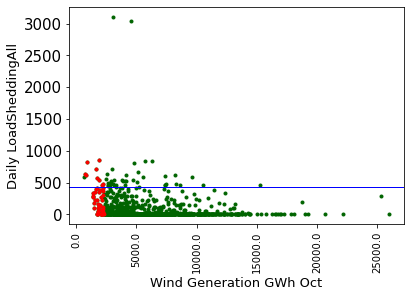

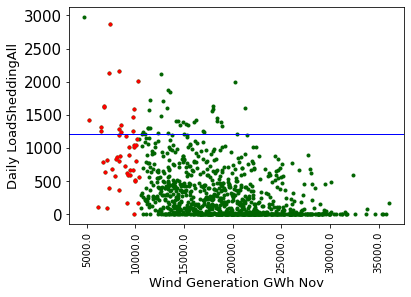

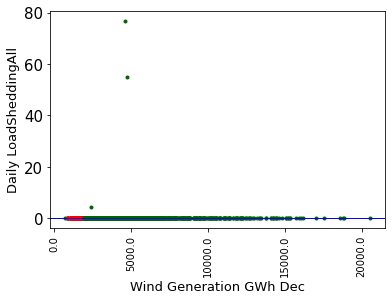

In [8]:
for date in ["Jan","Feb","Mar","Apr","June","Aug","Sep","Oct","Nov","Dec"]:
    Mean = pd.read_csv(file_dir+date+"\\Mean.csv")
    WindScenarios = pd.read_csv(file_dir+date+"\\WindScenariosAggregated.csv")
    SolarScenarios=pd.read_csv(file_dir+date+"\\SolarScenariosAggregated.csv")
    LoadScenarios=pd.read_csv(file_dir+date+"\\LoadScenariosAggregated.csv")
    VaticOutput = pd.read_csv(file_dir+date+"\\VaticOutput.csv")
    time= Mean['time']
    GenerationCostAll=VaticOutput['GenerationCostAll']
    LoadSheddingAll=VaticOutput['LoadSheddingAll']
    RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    PlotingRelationship2(time, WindScenarios,WindForecast,WindMean,SolarScenarios,SolarForecast,SolarMean, LoadScenarios,LoadForecast,LoadMean,date,True)

### Pattern of hourly load shed across days

This also varies widely, but generally load shed occurs either at night or evening, and appears to be driven by wind (downward spikes in wind generation?). Load shed happens during periods when high wind level is forecast.

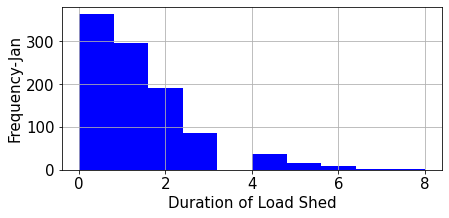

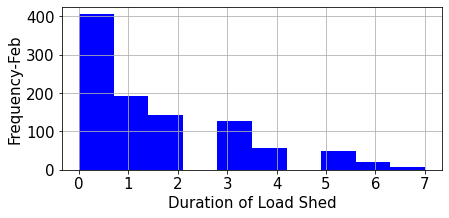

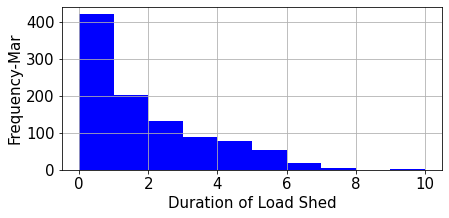

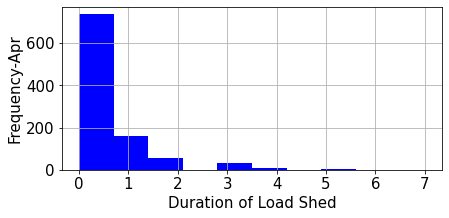

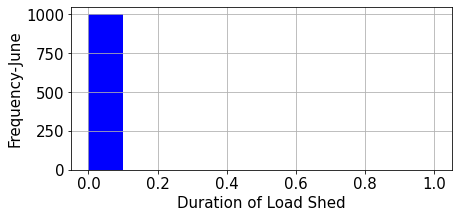

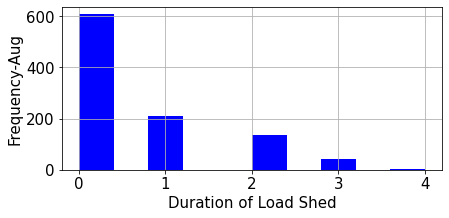

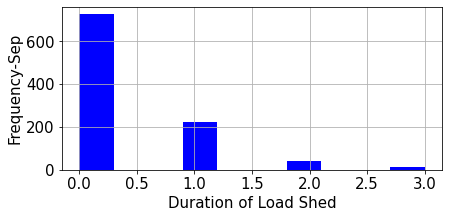

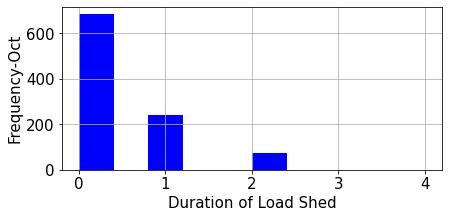

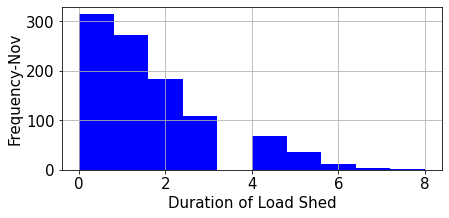

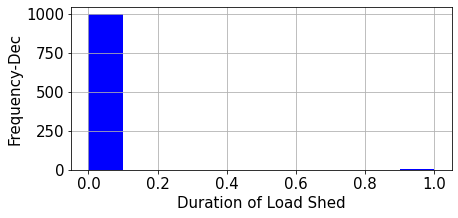

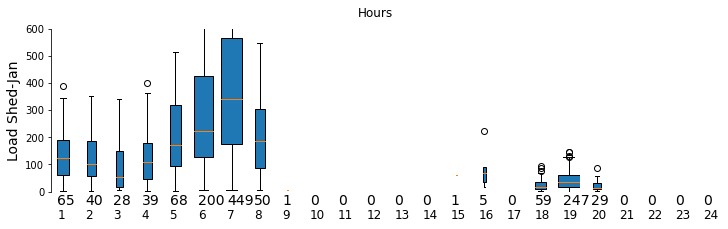

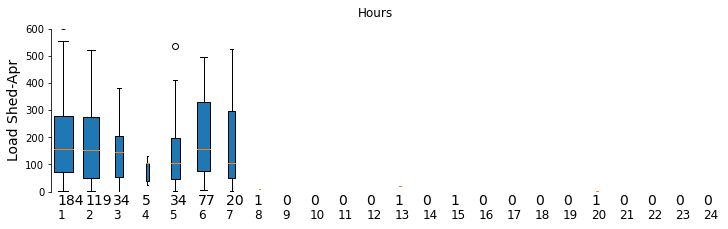

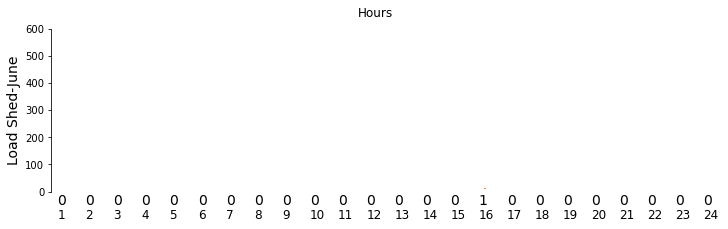

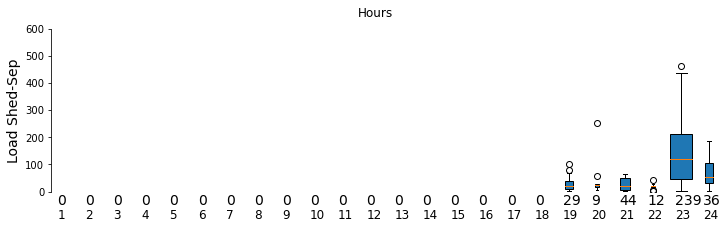

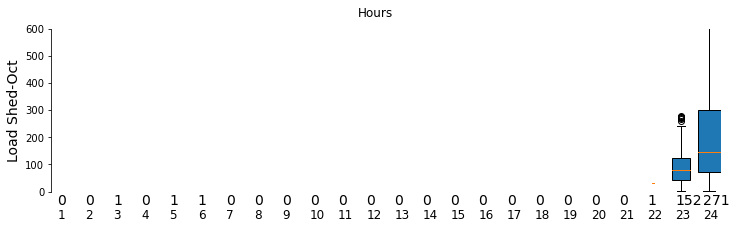

In [9]:
for date in ["Jan","Feb","Mar","Apr","June","Aug","Sep","Oct","Nov","Dec"]:
    LoadShedHour = pd.read_csv(file_dir+date+"\\LoadShedHour.csv")
    hours=LoadShedHour['hours']
    LoadShed=LoadShedHour['LoadShed']
    LoadShedHours(hours, LoadShed,date)
for date in ["Jan","Apr","June","Sep","Oct"]:
    LoadShedHour = pd.read_csv(file_dir+date+"\\LoadShedHour.csv")
    hours=LoadShedHour['hours']
    LoadShed=LoadShedHour['LoadShed']
    fig, axes = plt.subplots(nrows=1,ncols=24,figsize=(12,3))
    for i in range(0,24):
         ndx = (hours == i)
         curShed = LoadShed[ ndx]
         curShed = curShed[ curShed > 0]
         axes[i].boxplot(curShed,widths=np.sqrt(len(curShed))*0.06,patch_artist=True)
         axes[i].set_ylim(0,600)
         axes[i].axis('off')
         axes[i].text(0.75,-50,len(curShed), fontsize=14)
         axes[i].text(0.75,-100,i+1, fontsize=12)
    axes[0].set_axis_on()
    axes[0].spines['top'].set_visible(False)
    axes[0].spines['bottom'].set_visible(False)
    axes[0].spines['right'].set_visible(False)
    axes[0].set_xticks([])
    plt.suptitle('Hours')
    axes[0].set_ylabel('Load Shed-'+date,fontsize=14)

### Scenarios that produces the tail in the Vatic output
#### Sample date January: for Load-Solar-wind 
First row shows the Load-Solar-Wind scenarios and their mean. The second figure in the same row shows those scenarios which are always above the mean. The second column shows the mean and those scenarios (load-wind-solar) for which (a) highest 5% generation cost is produced, (b) highest 5% renewable curtailment, (c) Load shedding occurs.

The indices of the scenarios which are always above the mean of the scenarios [12, 230, 319, 342, 539, 587, 905]


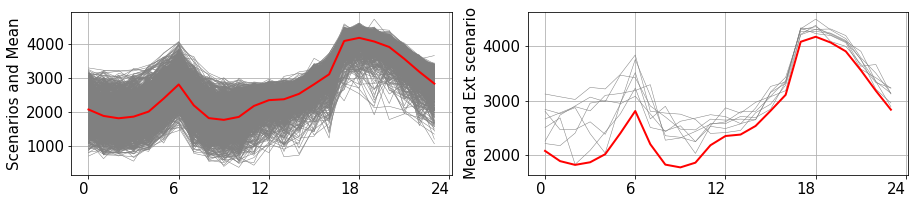

Daily production GWh for the mean, 63673.651625499995


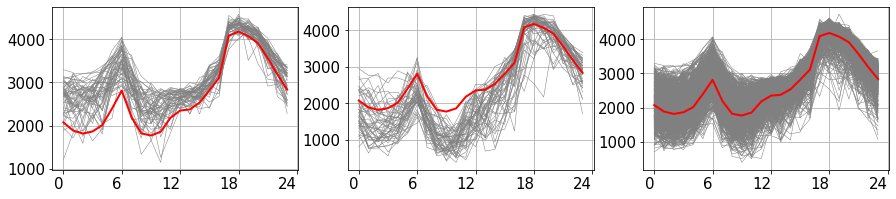

In [10]:
for date in ["Jan"]:
    Mean = pd.read_csv(file_dir+date+"\\Mean.csv")
    WindScenarios = pd.read_csv(file_dir+date+"\\WindScenariosAggregated.csv")
    SolarScenarios=pd.read_csv(file_dir+date+"\\SolarScenariosAggregated.csv")
    LoadScenarios=pd.read_csv(file_dir+date+"\\LoadScenariosAggregated.csv")
    VaticOutput = pd.read_csv(file_dir+date+"\\VaticOutput.csv")
    time= Mean['time']
    GenerationCostAll=VaticOutput['GenerationCostAll']
    LoadSheddingAll=VaticOutput['LoadSheddingAll']
    RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    DifferenceLoadWindSolar=LoadScenarios-WindScenarios-SolarScenarios
    Thresold=mean(DifferenceLoadWindSolar)
    GenCostIntegrationScen(DifferenceLoadWindSolar, Thresold, GenerationCostAll, RenewableCurtailmentAll, LoadSheddingAll, time,showHist=False)


#### For wind 

The indices of the scenarios which are always above the mean of the scenarios [564]


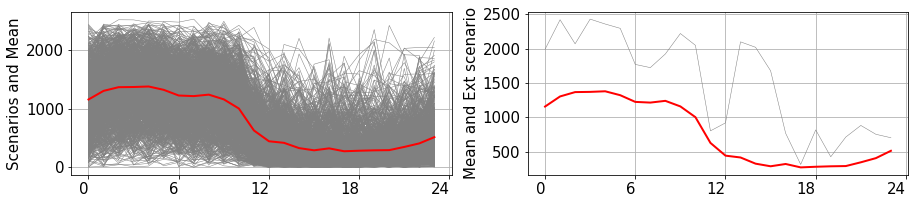

Daily production GWh for the mean, 18611.103845999998


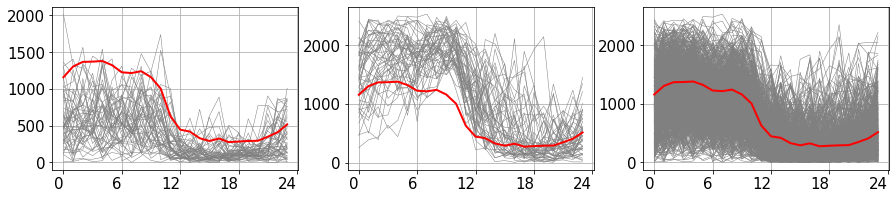

In [11]:
for date in ["Jan"]:
    Mean = pd.read_csv(file_dir+date+"\\Mean.csv")
    WindScenarios = pd.read_csv(file_dir+date+"\\WindScenariosAggregated.csv")
    SolarScenarios=pd.read_csv(file_dir+date+"\\SolarScenariosAggregated.csv")
    LoadScenarios=pd.read_csv(file_dir+date+"\\LoadScenariosAggregated.csv")
    VaticOutput = pd.read_csv(file_dir+date+"\\VaticOutput.csv")
    time= Mean['time']
    GenerationCostAll=VaticOutput['GenerationCostAll']
    LoadSheddingAll=VaticOutput['LoadSheddingAll']
    RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    DifferenceLoadWindSolar=WindScenarios
    Thresold=mean(DifferenceLoadWindSolar)
    GenCostIntegrationScen(DifferenceLoadWindSolar, Thresold, GenerationCostAll, RenewableCurtailmentAll, LoadSheddingAll, time,showHist=False)


In [16]:
def PCA_Scatter1(WindScenarios,W2,date,LoadSheddingAll):
    from sklearn.decomposition import PCA

    pca = PCA(n_components=3)
    principalComponents = pca.fit_transform(WindScenarios)
    principalDfWind = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2',  'principal component 3'])
    pca = PCA(n_components=3)
    principalComponents = pca.fit_transform(W2)
    principalDfW2 = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2',  'principal component 3'])

    fig = plt.figure(figsize=(15,3))

    ax = fig.add_subplot(1,2,1)
    plt.scatter(x=principalDfWind['principal component 1'], y=LoadSheddingAll)
    plt.xlabel("Wind-pc 1-"+date,fontsize=15)
    plt.ylabel("LoadSheddingAll-"+date,fontsize=15)
    ax.tick_params(labelsize=15)

    ax = fig.add_subplot(1,2,2)
    plt.scatter(x=principalDfWind['principal component 1'], y=principalDfWind['principal component 3'])
    plt.scatter(x=principalDfW2['principal component 1'], y=principalDfW2['principal component 3'])
    #plt.scatter(principalDfSolar['principal component 1'], principalDfSolar['principal component 3'])
    plt.xlabel("Wind-pc 1-"+date,fontsize=15)
    plt.ylabel("Wind-pc 3-"+date,fontsize=15)
    ax.tick_params(labelsize=15)

def PCA_Scatter2(WindScenarios,W2,date,GenerationCostAll):
    from sklearn.decomposition import PCA

    pca = PCA(n_components=3)
    principalComponents = pca.fit_transform(WindScenarios)
    principalDfWind = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2',  'principal component 3'])
    pca = PCA(n_components=3)
    principalComponents = pca.fit_transform(W2)
    principalDfW2 = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2',  'principal component 3'])

    fig = plt.figure(figsize=(15,3))

    ax = fig.add_subplot(1,2,1)
    plt.scatter(x=principalDfWind['principal component 1'], y=GenerationCostAll)
    plt.xlabel("Wind-pc 1-"+date,fontsize=15)
    plt.ylabel("Generation cost-"+date,fontsize=15)
    ax.tick_params(labelsize=15)

    ax = fig.add_subplot(1,2,2)
    plt.scatter(x=principalDfWind['principal component 1'], y=principalDfWind['principal component 3'])
    plt.scatter(x=principalDfW2['principal component 1'], y=principalDfW2['principal component 3'])
    #plt.scatter(principalDfSolar['principal component 1'], principalDfSolar['principal component 3'])
    plt.xlabel("Wind-pc 1-"+date,fontsize=15)
    plt.ylabel("Wind-pc 3-"+date,fontsize=15)
    ax.tick_params(labelsize=15)
    

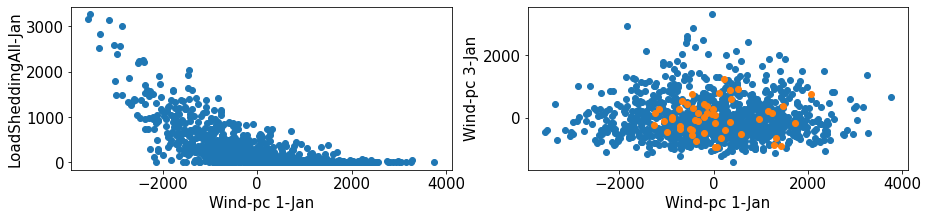

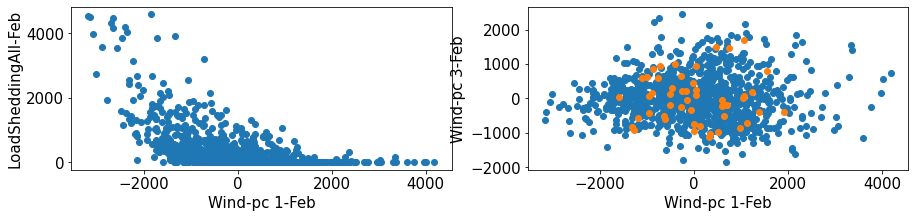

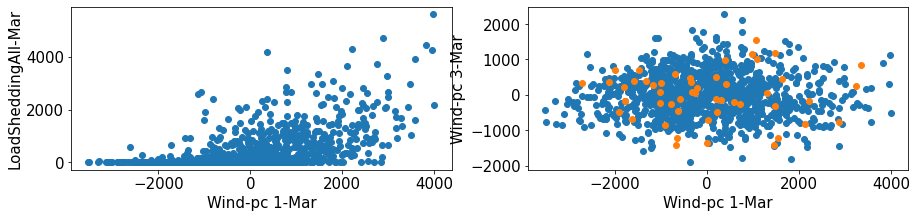

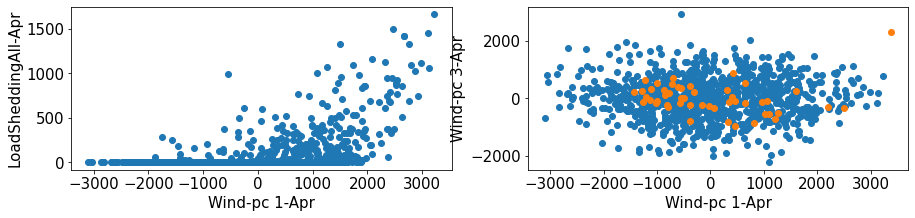

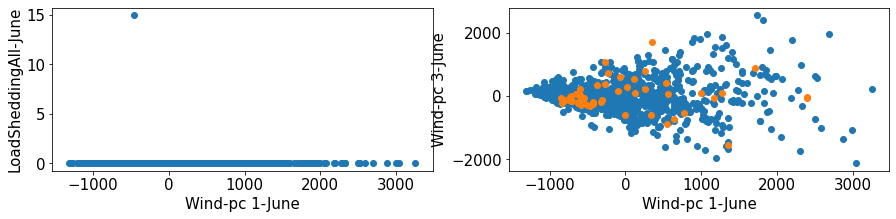

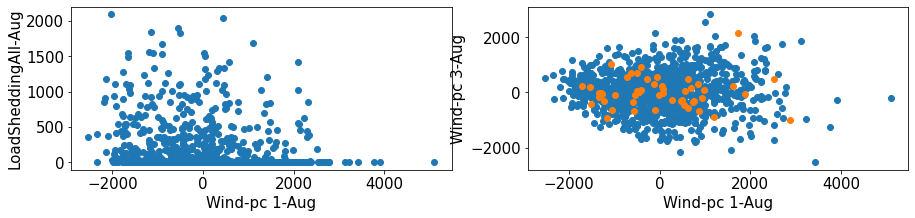

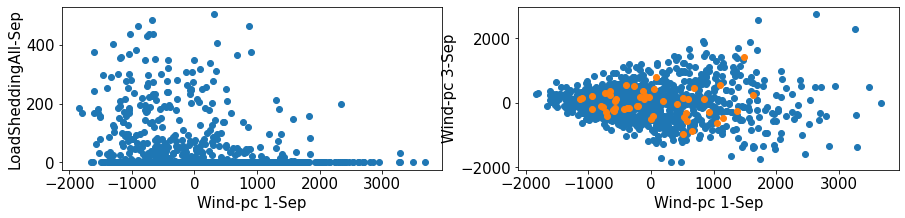

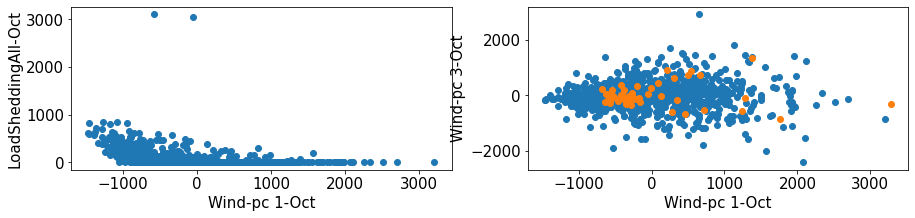

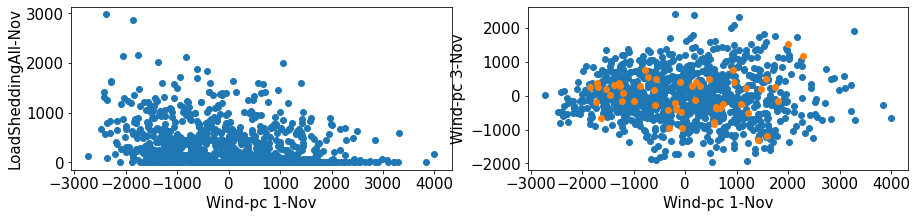

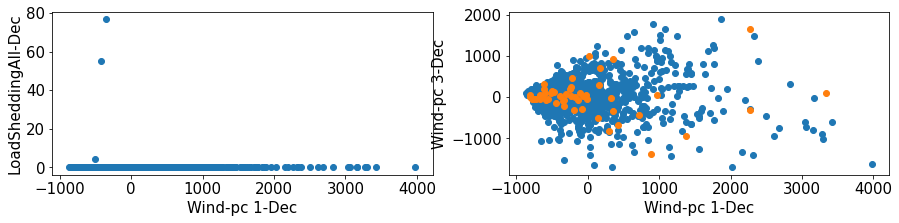

In [17]:
for date in ["Jan","Feb","Mar","Apr","June","Aug","Sep","Oct","Nov","Dec"]:
    WindScenarios = pd.read_csv(file_dir+date+"\\WindScenariosAggregated.csv")
    SolarScenarios=pd.read_csv(file_dir+date+"\\SolarScenariosAggregated.csv")
    VaticOutput = pd.read_csv(file_dir+date+"\\VaticOutput.csv")
    GenerationCostAll=VaticOutput['GenerationCostAll']
    LoadSheddingAll=VaticOutput['LoadSheddingAll']
    RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    sort_indexGenCostAll = np.argsort(LoadSheddingAll)
    s=np.array(sort_indexGenCostAll[950:1000])
    W2=(WindScenarios.values[s])
    PCA_Scatter1(WindScenarios,W2,date,LoadSheddingAll)


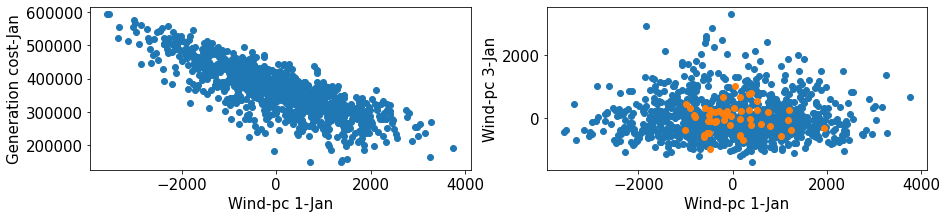

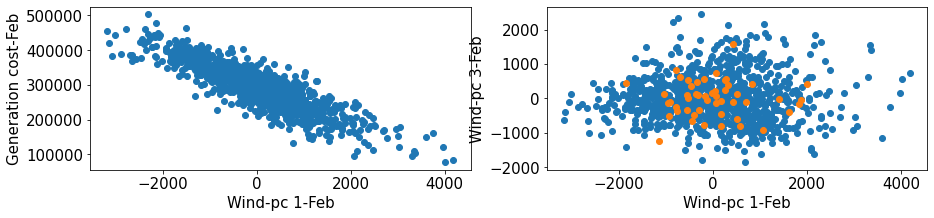

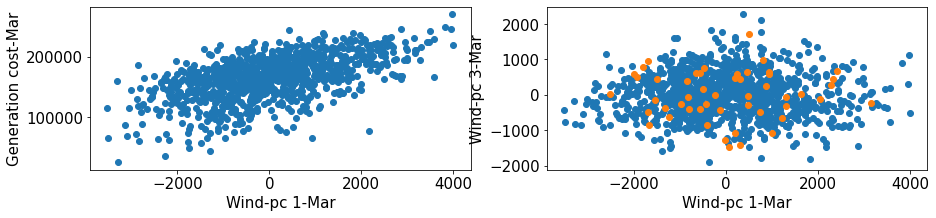

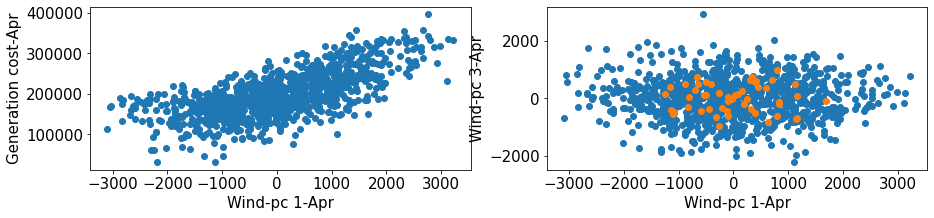

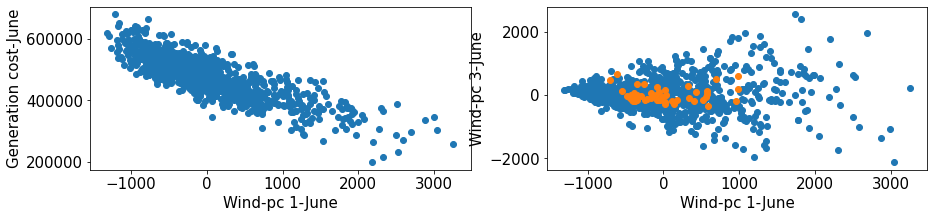

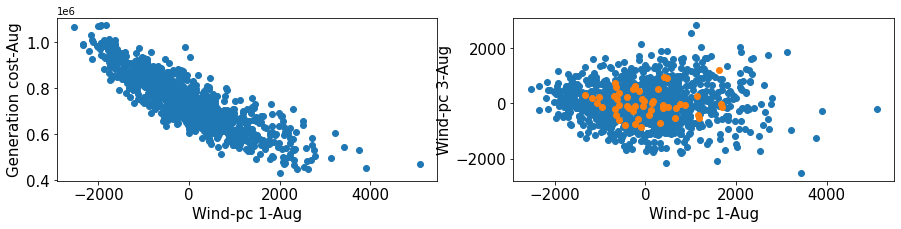

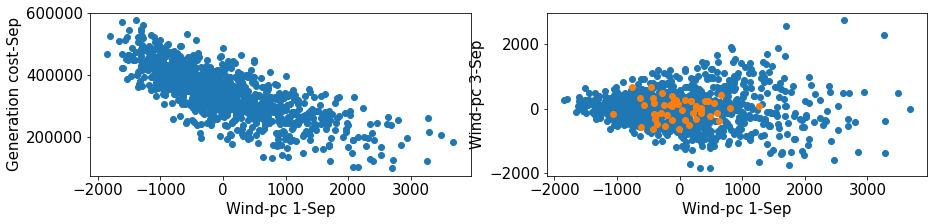

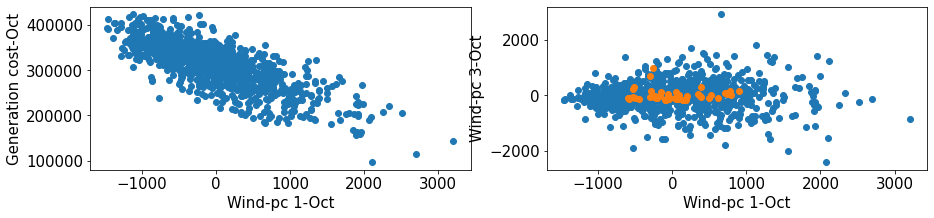

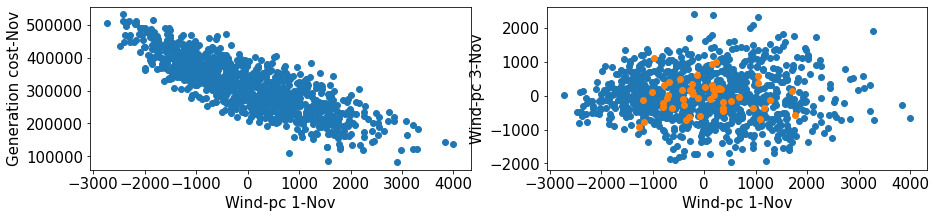

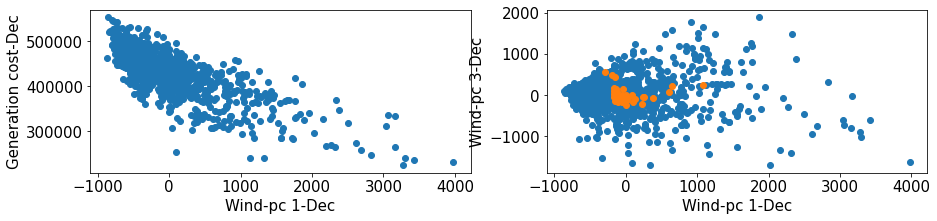

In [18]:
for date in ["Jan","Feb","Mar","Apr","June","Aug","Sep","Oct","Nov","Dec"]:
    WindScenarios = pd.read_csv(file_dir+date+"\\WindScenariosAggregated.csv")
    SolarScenarios=pd.read_csv(file_dir+date+"\\SolarScenariosAggregated.csv")
    
    VaticOutput = pd.read_csv(file_dir+date+"\\VaticOutput.csv")
    GenerationCostAll=VaticOutput['GenerationCostAll']
    LoadSheddingAll=VaticOutput['LoadSheddingAll']
    RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    sort_indexGenCostAll = np.argsort(GenerationCostAll)
    s=np.array(sort_indexGenCostAll[950:1000])

    W2=(WindScenarios.values[s])

    PCA_Scatter2(WindScenarios,W2,date,GenerationCostAll)


Daily production GWh for the mean, 63673.651625499995


C:\Users\Mahashweta Patra\GenCostIntegrationScenario.py:170: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_scatter.set_xticklabels(ax_scatter.get_xticks(), rotation = 90, fontsize=10)


check 496548.40001165
Probability/2 43
Daily production GWh for the mean, 58812.26640839998
check 399704.7449441
Probability/2 34
Daily production GWh for the mean, 37731.509836900004
check 218735.48746355
Probability/2 21
Daily production GWh for the mean, 58009.53733880001
check 299937.6222929
Probability/2 41
Daily production GWh for the mean, 106011.84560320002
check 579740.5078276499
Probability/2 35
Daily production GWh for the mean, 115009.69582960002
check 936266.4693152
Probability/2 40
Daily production GWh for the mean, 81284.47088749996
check 474807.29870815
Probability/2 31
Daily production GWh for the mean, 68962.20681959999
check 388582.1741194
Probability/2 43
Daily production GWh for the mean, 61982.57373689999
check 447738.9218442
Probability/2 39
Daily production GWh for the mean, 73089.1726718
check 498801.837464
Probability/2 35


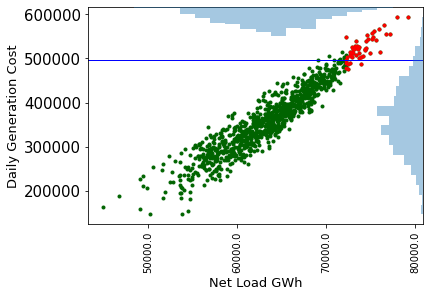

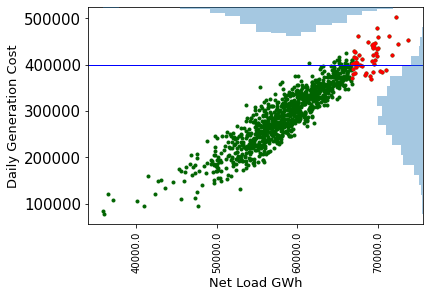

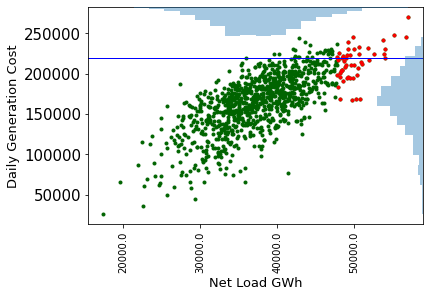

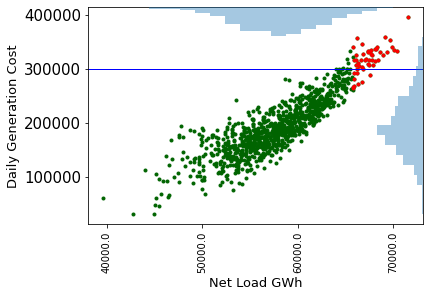

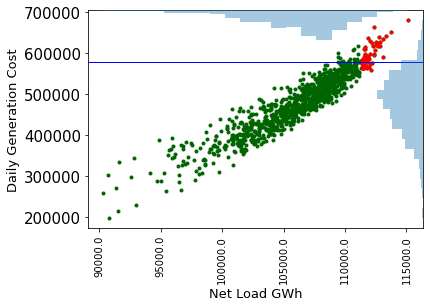

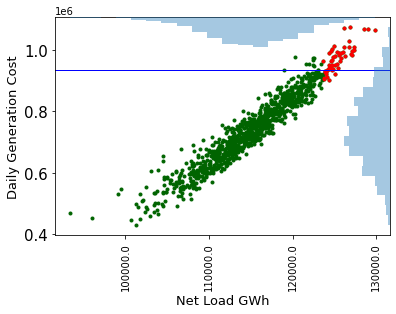

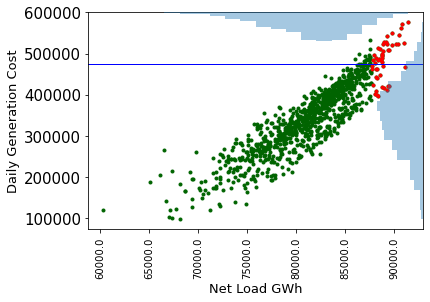

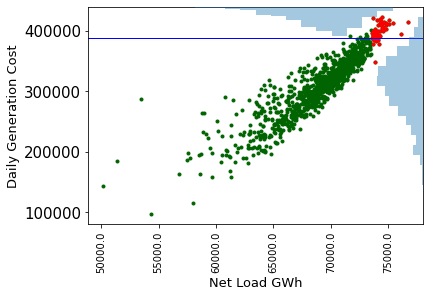

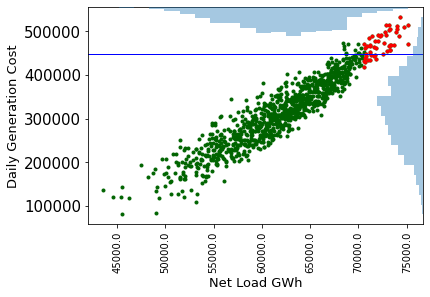

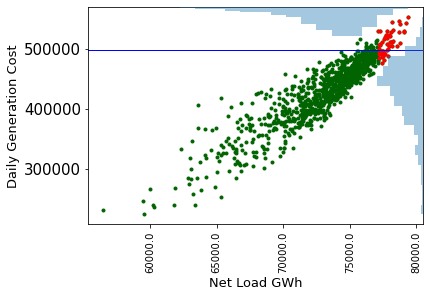

In [19]:
for date in ["Jan","Feb","Mar","Apr","June","Aug","Sep","Oct","Nov","Dec"]:
    Mean = pd.read_csv(file_dir+date+"\\Mean.csv")
    WindScenarios = pd.read_csv(file_dir+date+"\\WindScenariosAggregated.csv")
    SolarScenarios=pd.read_csv(file_dir+date+"\\SolarScenariosAggregated.csv")
    LoadScenarios=pd.read_csv(file_dir+date+"\\LoadScenariosAggregated.csv")
    VaticOutput = pd.read_csv(file_dir+date+"\\VaticOutput.csv")
    time= Mean['time']
    GenerationCostAll=VaticOutput['GenerationCostAll']
    LoadSheddingAll=VaticOutput['LoadSheddingAll']
    RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    PlotingRelationship1(time, WindScenarios,WindForecast,WindMean,SolarScenarios,SolarForecast,SolarMean, LoadScenarios,LoadForecast,LoadMean, date, True)
    #sort_indexGenCostAll = np.argsort(GenerationCostAll)
    #s=np.array(sort_indexGenCostAll[950:1000])

    #W2=(WindScenarios.values[s])

    #PCA_Scatter2(WindScenarios,W2,date,GenerationCostAll)


In [20]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
DifferenceLoadWindSolar=LoadScenarios-WindScenarios-SolarScenarios
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(DifferenceLoadWindSolar)

KMeans(init='random', n_clusters=3, random_state=42)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
#sklearn 
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import scale # for scaling the data
import sklearn.metrics as sm # for evaluating the model
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
%matplotlib inline 
rcParams["figure.figsize"] =20,10

In [76]:
from sklearn.decomposition import PCA
for date in ["Jan"]:
    Mean = pd.read_csv(file_dir+date+"\\Mean.csv")
    WindScenarios = pd.read_csv(file_dir+date+"\\WindScenariosAggregated.csv")
    pca = PCA(n_components=3)
    principalComponents = pca.fit_transform(WindScenarios)
    principalDfWind = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2',  'principal component 3'])

    kmeans_data = principalDfWind 
    features_value = kmeans_data.values
    print(features_value)
  

[[-5.32482789e+02 -5.91586996e+02 -4.98198025e+02]
 [-5.65533904e+02 -7.01646452e+02 -5.89977139e+02]
 [-8.97442593e-01  2.40727399e+02  8.65339935e+01]
 ...
 [-5.73412010e+02  4.04621950e+02  4.00715379e+02]
 [ 5.85712309e+02  8.02340139e+02 -5.82273941e+02]
 [ 2.33693124e+03  8.48811695e+02  1.50725268e+03]]


In [78]:
from sklearn.cluster import KMeans
inertia = []
distortions=[]
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features_value)
    inertia.append(km.inertia_)
    distortions.append(sum(np.min(cdist(features_value,
    km.cluster_centers_, 'euclidean'),axis=1)) /
    features_value.shape[0])

C:\Users\Mahashweta Patra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


NameError: name 'cdist' is not defined

In [74]:
clustering = KMeans(n_clusters=3,random_state=5)
#fit the dataset
clustering.fit(values)

#iris_df = pd.DataFrame(values)
#print(iris_df)
#iris_df.columns = ["0","1","2" ]
#target.columns =["Target"]

KMeans(n_clusters=3, random_state=5)

Text(0.5, 1.0, 'K means Classifcation')

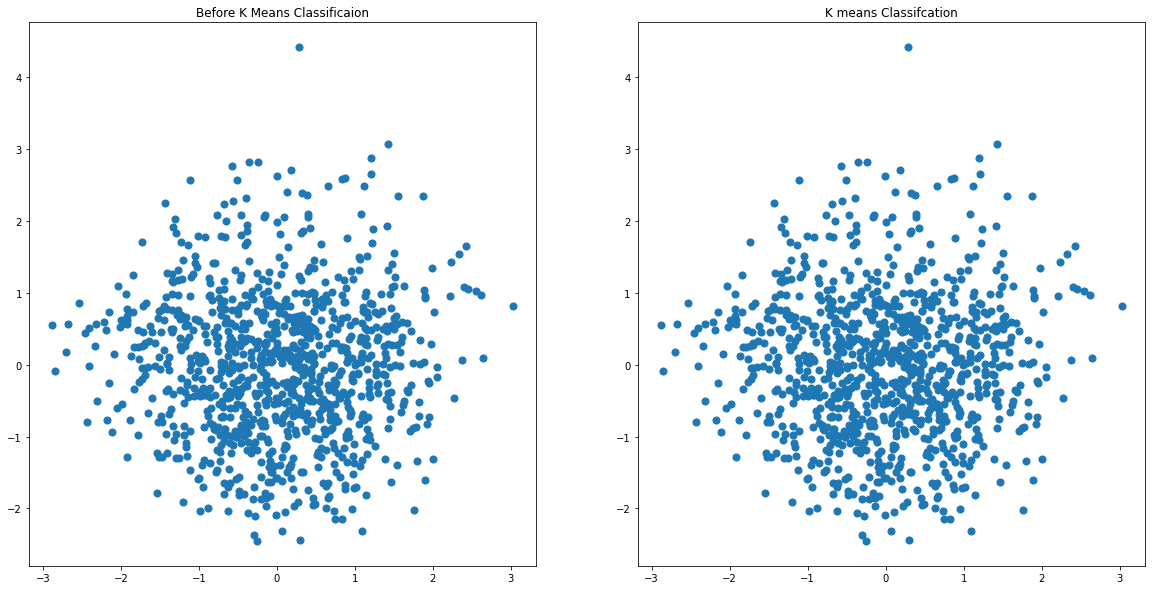

In [70]:
#colors = np.array(["Red","Green","Blue"])
plt.subplot(1,2,1)
plt.scatter(x=iris_df["0"] ,y= iris_df["1"],s=50)
plt.title("Before K Means Classificaion")

plt.subplot(1,2,2)
plt.scatter(x=iris_df["0"] ,y= iris_df["1"],s=50)
plt.title("K means Classifcation")

In [64]:
relabel = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)
colors = np.array(["Red","Green","Blue"])
plt.subplot(1,2,1)
plt.scatter(x=iris_df["0"] ,y= iris_df["1"],c = colors[iris.target],s=50)
plt.title("Before K Means Classificaion")

plt.subplot(1,2,2)
plt.scatter(x=iris_df["0"] ,y= iris_df["1"],c = colors[relabel],s=50)
plt.title("K means Classifcation")

ValueError: invalid entry in choice array